# Le Pendule

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Résolution pour différentes valeurs de q

Text(0, 0.5, 'Valeur de theta')

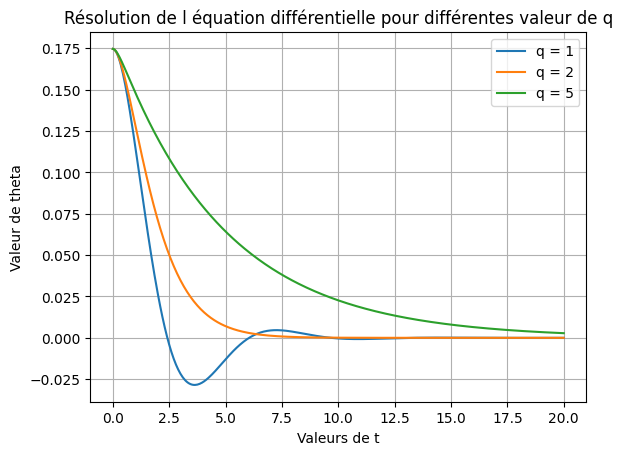

In [11]:
def methode_RK4(f, g, t0, teta0, z0, dt, tmax):
    
    vlr_t = [t0]
    vlr_teta= [teta0]
    vlr_z = [z0]
    
    while vlr_t[-1] < tmax: 
        
        t = vlr_t[-1]
        teta = vlr_teta[-1]
        z = vlr_z[-1]
        
        k1teta = dt * f(t, teta, z)
        
        k1z = dt * g(t, teta, z)
        
        k2teta = dt * f(t + dt/2, teta + k1teta/2, z + k1z/2)
        k2z = dt * g(t + dt/2, teta + k1teta/2, z + k1z/2)
        
        k3teta = dt * f(t + dt/2, teta + k2teta/2, z + k2z/2)
        k3z = dt * g(t + dt/2, teta + k2teta/2, z + k2z/2)
        
        k4teta = dt * f(t + dt, teta + k3teta, z + k3z)
        k4z = dt * g(t + dt, teta + k3teta, z + k3z)
        
        teta_suivant = teta + (1/6) * (k1teta + 2*k2teta + 2*k3teta + k4teta)
        z_suivant = z + (1/6) * (k1z + 2*k2z + 2*k3z + k4z)
        
        vlr_t.append(t + dt)
        vlr_teta.append(teta_suivant)
        vlr_z.append(z_suivant)
    
    return vlr_t, vlr_teta, vlr_z

def f(t, teta, z):
    return z

def g(t, teta, z):
    return -q*z - omeg**2*teta

# Conditions initiales
t0 = 0
teta0 = 10*np.pi/180
z0 = 0
omeg = 1
vlr_q = [1,2,5]

# Pas de temps et valeur maximale de t
dt = 0.05
tmax = 20

# Résolution de l'équation différentielle
for q in vlr_q : 
    vlr_t, vlr_teta = methode_RK4(f, g, t0, teta0, z0, dt, tmax)[0], methode_RK4(f, g, t0, teta0, z0, dt, tmax)[1]
    plt.plot(vlr_t, vlr_teta, label=f'q = {q}')
    
plt.grid()
plt.legend()
plt.title('Résolution de l équation différentielle pour différentes valeur de q')
plt.xlabel('Valeurs de t')
plt.ylabel('Valeur de theta')

## Force d'éxcitation

Text(0, 0.5, 'Valeur de la dérivée de theta')

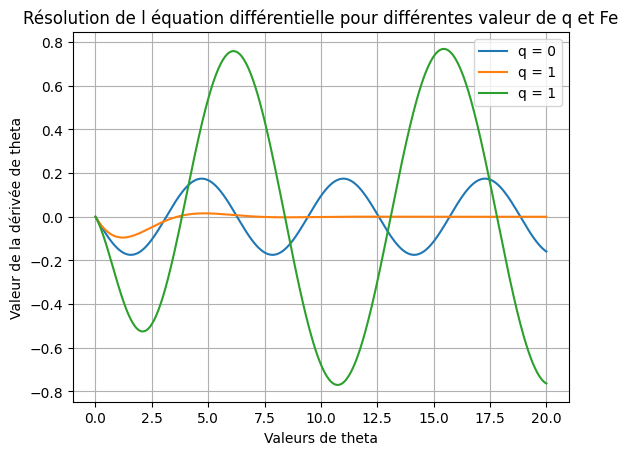

In [13]:
def nvl_g(t, teta, z, q, Fe):
    return -q*z - omeg**2*teta - Fe*np.sin(omega*t)

#nouvel variable
omega = (2*omeg)/3
nvl_vlr_q = [0,1,1]
vlr_Fe = [0,0,1]

for (q, Fe) in zip(nvl_vlr_q, vlr_Fe):
    vlr_z, vlr_teta = methode_RK4(f, (lambda t, teta, z : nvl_g(t, teta, z, q, Fe)), t0, teta0, z0, dt, tmax)[2], methode_RK4(f, (lambda t, teta, z : nvl_g(t, teta, z, q, Fe)), t0, teta0, z0, dt, tmax)[0]
    plt.plot(vlr_teta, vlr_z, label=f'q = {q}')
    
plt.grid()
plt.legend()
plt.title('Résolution de l équation différentielle pour différentes valeur de q et Fe')
plt.xlabel('Valeurs de theta')
plt.ylabel('Valeur de la dérivée de theta')